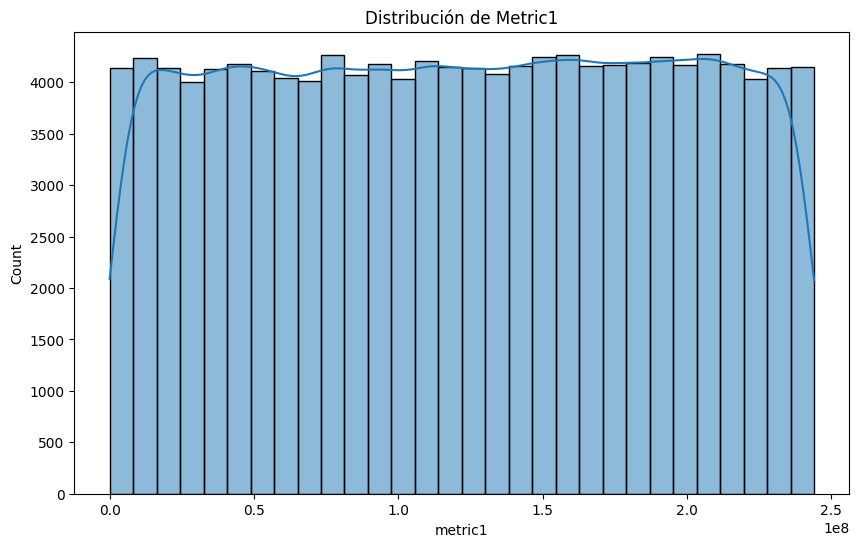

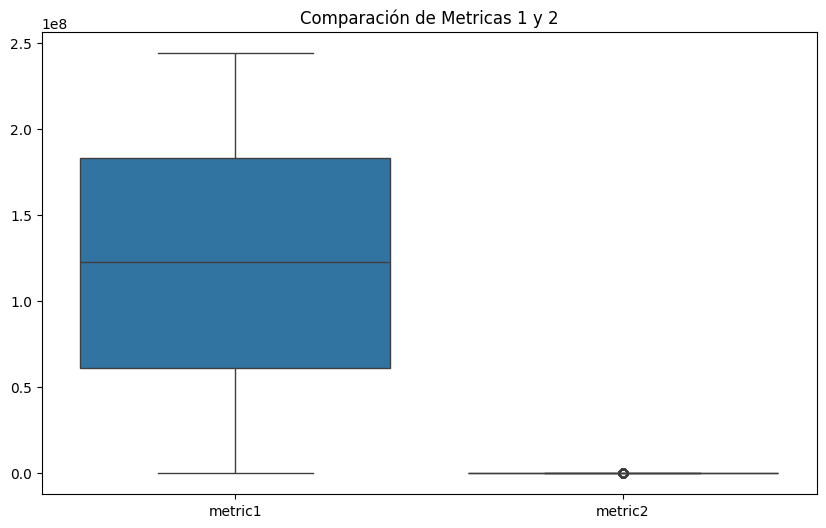

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24881
           1       0.00      0.00      0.00        18

    accuracy                           1.00     24899
   macro avg       0.50      0.50      0.50     24899
weighted avg       1.00      1.00      1.00     24899



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Cargando el conjunto de datos
data = pd.read_csv('/content/predictive_maintenance_dataset.csv.zip')

# Convertimos la columna 'date' a tipo datetime
data['date'] = pd.to_datetime(data['date'])

# Asumimos que no hay valores nulos; si los hubiera, los manejamos aquí
data.fillna(method='ffill', inplace=True)  # ejemplo de imputación

# Ingeniería de características simple, por ejemplo, agregando promedios móviles
data['metric1_avg'] = data['metric1'].rolling(window=7, min_periods=1).mean()

# Histograma de una métrica
plt.figure(figsize=(10, 6))
sns.histplot(data['metric1'], bins=30, kde=True)
plt.title('Distribución de Metric1')
plt.show()

# Boxplot para comparar métricas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['metric1', 'metric2']])
plt.title('Comparación de Metricas 1 y 2')
plt.show()

# Preparar los datos para el modelo
X = data[['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric1_avg']]  # características
y = data['failure']  # etiqueta objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el clasificador
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
predictions = clf.predict(X_test)

# Mostrar el informe de clasificación
print(classification_report(y_test, predictions))


